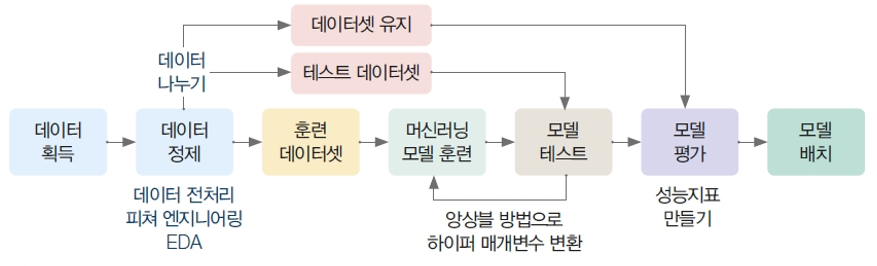

데이터 확보의 최적의 장소
  - 데이콘, 캐글, 공공기관...
  - https://www.kaggle.com/c/titanic/data

In [1]:
!unzip '/content/titanic.zip'

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import numpy as np
import pandas as pd

In [3]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [4]:
train_df.columns, test_df.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [5]:
set(train_df.columns) - set(test_df.columns)

{'Survived'}

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df = pd.concat([train_df,test_df])
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# PassengerId	승객고유번호
# Survived	생존유무 0:사망 1:생존
# Pclass	1:1등석 2:2등석 3:3등석
# Name	승객이름
# Sex	성별
# Age	 나이
# SibSp	 타이타닉밖의 형제자매/부부의 수
# Parch	타이타닉밖의 부모/자식의 수
# Ticket	티켓번호
# Fare	 티켓가격
# Cabin	 객실번호
# Embarked 승선항구

In [10]:
# 결측치 여부 조사
df.isnull().mean()

PassengerId    0.000000
Survived       0.319328
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

데이터 노트작성
  - 각 데이터의 현재 데이터타입을 올바르게 정의하고
  - 어떻게 처리할 것인지를 적는다.

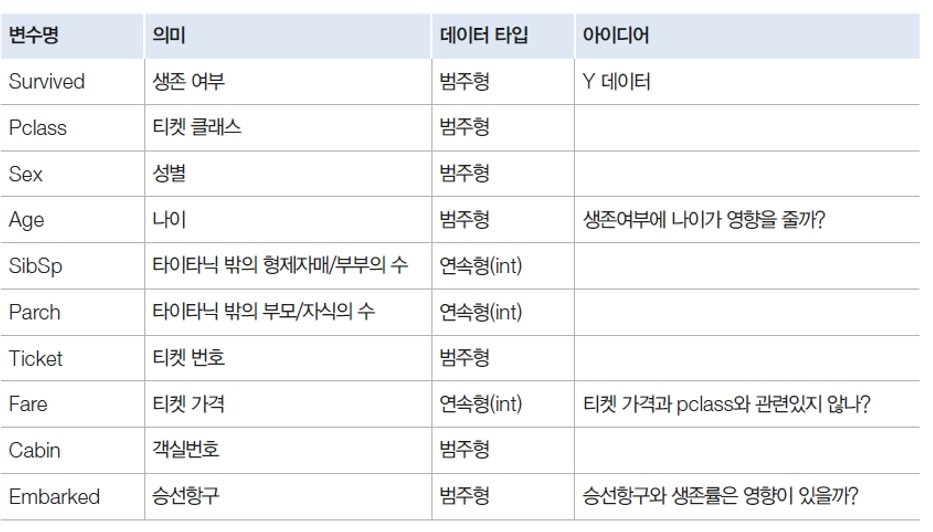

In [11]:
drop_list = ['Ticket','Fare','Cabin','PassengerId','Name','Survived']

In [12]:
new_df = df.drop(columns=drop_list)

In [13]:
new_df.isnull().mean()

Pclass      0.000000
Sex         0.000000
Age         0.200917
SibSp       0.000000
Parch       0.000000
Embarked    0.001528
dtype: float64

데이터의 모양 확인
  - T함수를 사용

In [14]:
new_df.head(2).T

,0,1
Pclass,3,1
Sex,male,female
Age,22.0,38.0
SibSp,1,1
Parch,0,0
Embarked,S,C


In [15]:
# 결측치  나이는 성별에따른 평균값으로 처리

In [16]:
new_df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [17]:
new_df.groupby('Sex')['Age'].transform('mean')

0       30.585228
1       28.687088
2       28.687088
3       28.687088
4       30.585228
          ...    
1304    30.585228
1305    28.687088
1306    30.585228
1307    30.585228
1308    30.585228
Name: Age, Length: 1309, dtype: float64

In [18]:
new_df.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [19]:
#  선실등급,성별 에따른 나이의 평균
new_df.groupby(['Pclass','Sex'])['Age'].transform('mean')

0       25.962264
1       37.037594
2       22.185329
3       37.037594
4       25.962264
          ...    
1304    25.962264
1305    37.037594
1306    25.962264
1307    25.962264
1308    25.962264
Name: Age, Length: 1309, dtype: float64

In [20]:
new_df['Age'] = new_df['Age'].fillna(  new_df.groupby(['Pclass','Sex'])['Age'].transform('mean')      )

In [21]:
new_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [22]:
new_df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [23]:
new_df['Embarked'] = new_df['Embarked'].fillna('S')

In [24]:
new_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

범주형 데이터 처리 : 원핫인코딩
  - 범주형 데이터를 식별
    - df.info() : 열별로 데이터 타입 확인

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Embarked  1309 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 61.5+ KB


데이터 타입 정리

In [26]:
object_columns = ['Sex', 'Embarked' ]
numeric_columns = ['Pclass','Age','SibSp','Parch']

In [27]:
# 원핫인코딩
pd.get_dummies(new_df)

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,0,1,0,0,1
1,1,38.000000,1,0,1,0,1,0,0
2,3,26.000000,0,0,1,0,0,0,1
3,1,35.000000,1,0,1,0,0,0,1
4,3,35.000000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,25.962264,0,0,0,1,0,0,1
1305,1,39.000000,0,0,1,0,1,0,0
1306,3,38.500000,0,0,0,1,0,0,1
1307,3,25.962264,0,0,0,1,0,0,1


데이터 전처리 과정
  - 1. 데이터 확보
  - 2. 도메인지식을 바탕으로 불필요한 컬럼 drop
  - 3. 결측치 확인
    - df.isnull().sum(),  df.isnull().mean(), df.info()
  - 4. 결측치 처리( fillna() ) 방안
    - 연속형(수치형)
      - 평균 , 최대,최소,표준편차..
      - df.groupby('')[''].transform('mean')
    - 범주형   
      - 최빈값
  - 5. 범주형 데이터 처리
    - 원핫인코딩적용
      

데이터 시각화
  - y 값과 각 타입간의 관계
  - 범주형 타입간에 어떤 관계가 있는지를 확인

성별에 따른 생존유무 시각화
선실등급에 따른 생존유무 시각화
승선항에 따른 생존유무 시각화

In [28]:
new_df['Survived'] = df['Survived']

In [29]:
new_df = new_df[new_df['Survived'].isnull().astype(int) == 0]
new_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0.0
1,1,female,38.0,1,0,C,1.0
2,3,female,26.0,0,0,S,1.0
3,1,female,35.0,1,0,S,1.0
4,3,male,35.0,0,0,S,0.0


In [30]:
new_df['Survived'] = new_df['Survived'].astype(int)

<ipython-input-30-85e7640281fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Survived'] = new_df['Survived'].astype(int)


In [31]:
new_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


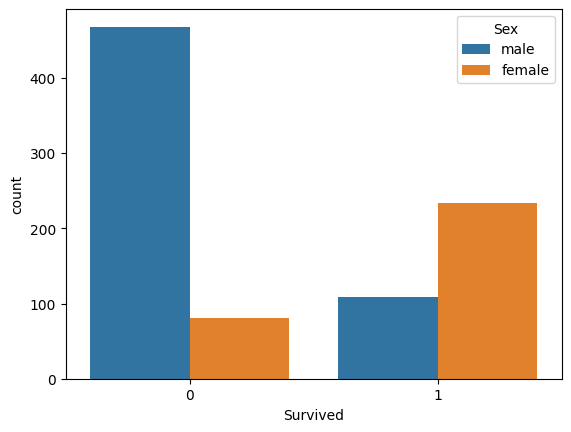

In [32]:
sns.countplot(data = new_df,x='Survived',hue='Sex')
plt.show()

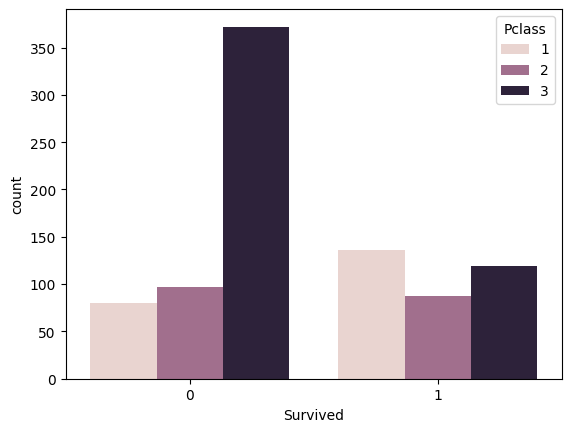

In [33]:
# sns.FacetGrid(data=new_df,col = 'Survived')
sns.countplot(data = new_df,x='Survived',hue='Pclass')
plt.show()

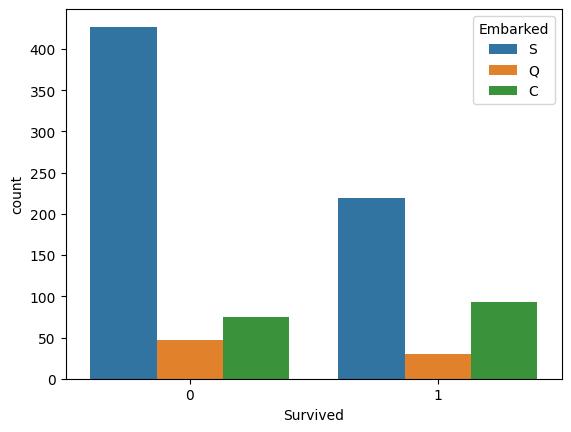

In [37]:
# 승선항구별로 생존유무
sns.countplot(data = new_df, x='Survived', hue = 'Embarked')
plt.show()

범주형 데이터 간 상관관계 분석

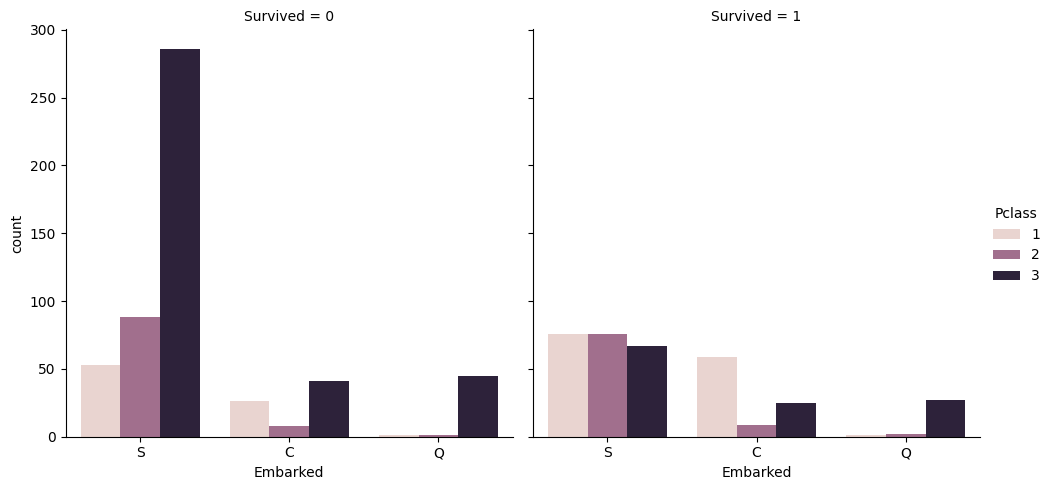

In [41]:
sns.catplot(data=new_df, col="Survived",x='Embarked',kind='count',hue='Pclass')
plt.show()

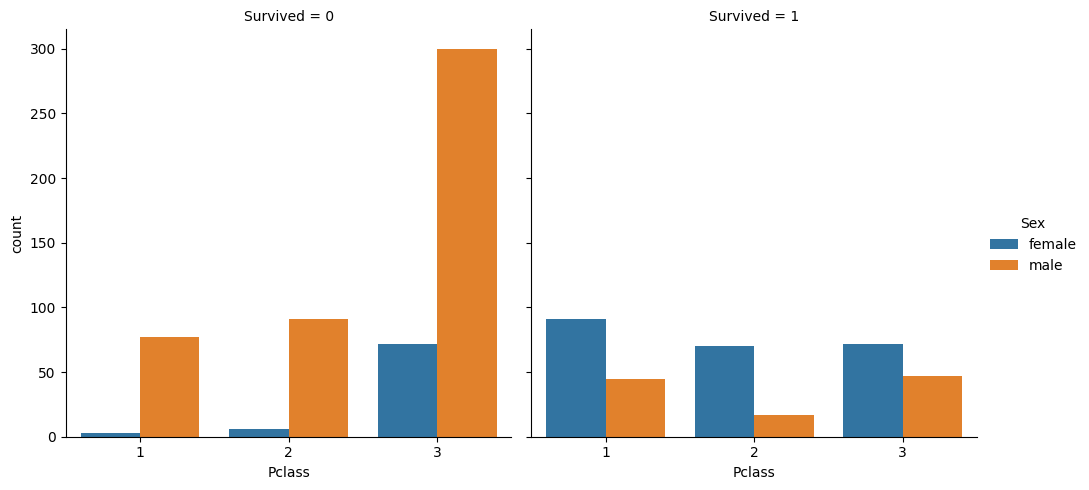

In [42]:
sns.catplot(data=new_df, col="Survived",x='Pclass',kind='count',hue='Sex')
plt.show()

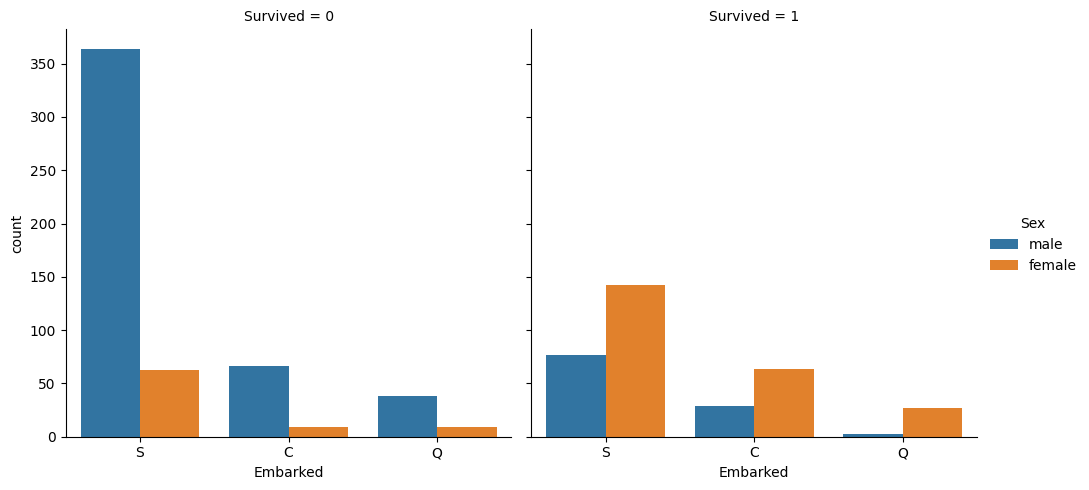

In [43]:
sns.catplot(data=new_df, col="Survived",x='Embarked',kind='count',hue='Sex')
plt.show()

변수들간의 상관관계
  - x1, x2  의 변수가 x1이 증가하면 같은 패턴으로 x2도 증가 한다.. 두 변수는 상관관계에 있다
  - 상관관계는 인관관계가 아님을 주의할 것

In [45]:
new_df

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.000000,1,0,S,0
1,1,female,38.000000,1,0,C,1
2,3,female,26.000000,0,0,S,1
3,1,female,35.000000,1,0,S,1
4,3,male,35.000000,0,0,S,0
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,S,0
887,1,female,19.000000,0,0,S,1
888,3,female,22.185329,1,2,S,0
889,1,male,26.000000,0,0,C,1


In [46]:
new_df.corr()

<ipython-input-46-326e7bbec5b0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.411177,0.083081,0.018443,-0.338481
Age,-0.411177,1.000000,-0.249843,-0.179520,-0.062011
SibSp,0.083081,-0.249843,1.000000,0.414838,-0.035322
Parch,0.018443,-0.179520,0.414838,1.000000,0.081629
Survived,-0.338481,-0.062011,-0.035322,0.081629,1.000000


In [48]:
pd.get_dummies(new_df).corr()

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Pclass,1.000000,-0.411177,0.083081,0.018443,-0.338481,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,-0.411177,1.000000,-0.249843,-0.179520,-0.062011,-0.104977,0.104977,0.043082,-0.084995,0.015746
SibSp,0.083081,-0.249843,1.000000,0.414838,-0.035322,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.018443,-0.179520,0.414838,1.000000,0.081629,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Survived,-0.338481,-0.062011,-0.035322,0.081629,1.000000,0.543351,-0.543351,0.168240,0.003650,-0.149683
Sex_female,-0.131900,-0.104977,0.114631,0.245489,0.543351,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,0.131900,0.104977,-0.114631,-0.245489,-0.543351,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,-0.243292,0.043082,-0.059528,-0.011069,0.168240,0.082853,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.221009,-0.084995,-0.026354,-0.081228,0.003650,0.074115,-0.074115,-0.148258,1.000000,-0.499421
Embarked_S,0.074053,0.015746,0.068734,0.060814,-0.149683,-0.119224,0.119224,-0.782742,-0.499421,1.000000


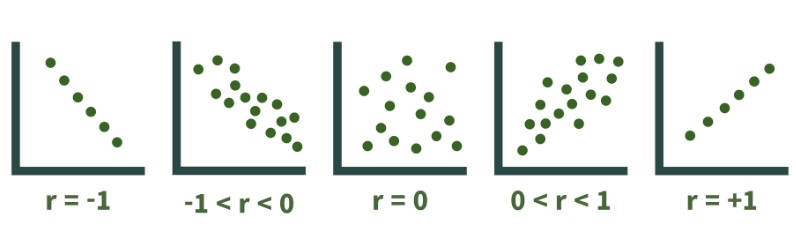

상관관계는 heatmap으로 시각화

<Axes: >

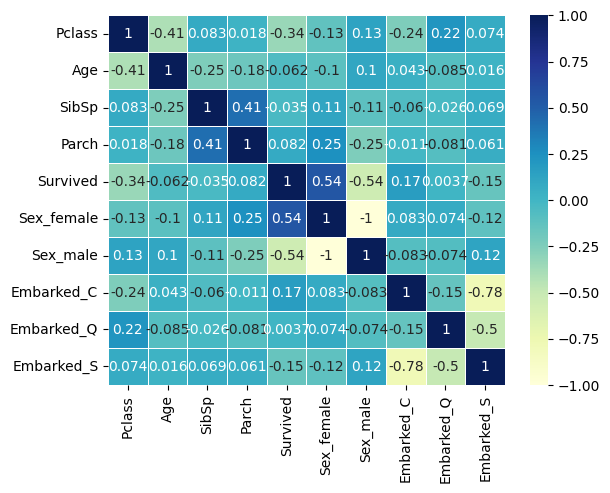

In [54]:
corr = pd.get_dummies(new_df).corr()
sns.heatmap(corr, annot=True, linewidths=.5, cmap='YlGnBu')

정리
  - 시각화 함수 SNS
    - lineplot : 선그래프, 신뢰구간
    - regplot : 선형회귀 그래프 (데이터를 기반으로 값의 변화를 예측)
    - scatterplot : 산점도 데이터의 분포를 파악
    - countplot : 빈도수
    - barplot : 막대그래프(countplot과 유사) 신뢰구간
    - violinplot , swarmplot
    
    - FacetGrid : 그리드 생성
      - map을이용해서 범주형 데이터를 그려준다
      - 전체 데이터를 범주형 데이터의 관점에서 나눠서 본다
    - 범주형 데이터간의 상관관계 분석
      - catplot
    - 상관관계를 시각화
      - heatmap

실습 - 2 -
  - https://github.com/mwaskom/seaborn-data

In [55]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [56]:
# sepal_length : 꽃받침의 길이
# petal_length : 꽃술의 길이
# species

데이터 탐색

In [57]:
#1 결측치 여부 조사
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [58]:
# 데이터의 모양
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


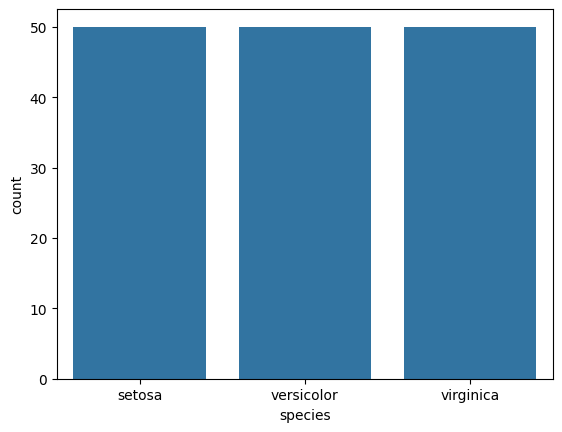

In [59]:
sns.countplot(data=iris_df,x='species')
plt.show()

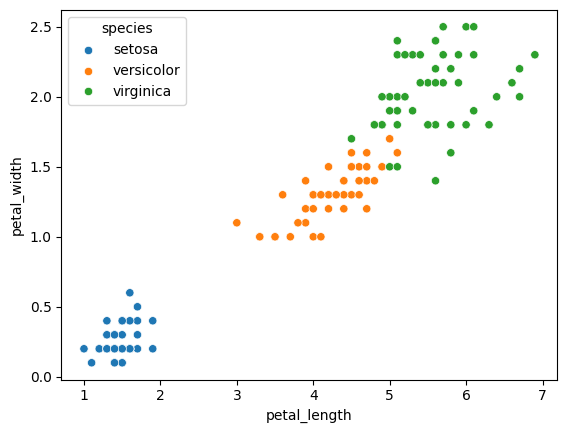

In [62]:
# sns.scatterplot(data = iris_df, x='sepal_length',y='sepal_width')
sns.scatterplot(data = iris_df, x='petal_length',y='petal_width',hue = 'species')
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

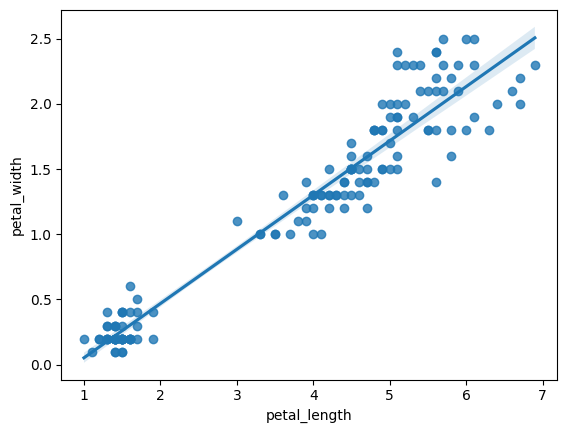

In [63]:
sns.regplot(data = iris_df, x='petal_length', y='petal_width')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

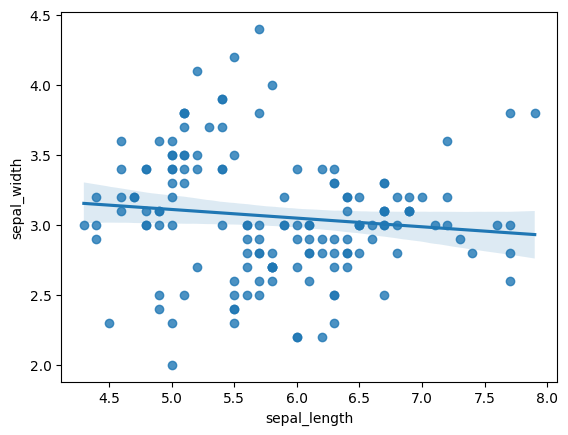

In [64]:
sns.regplot(data = iris_df, x='sepal_length', y='sepal_width')

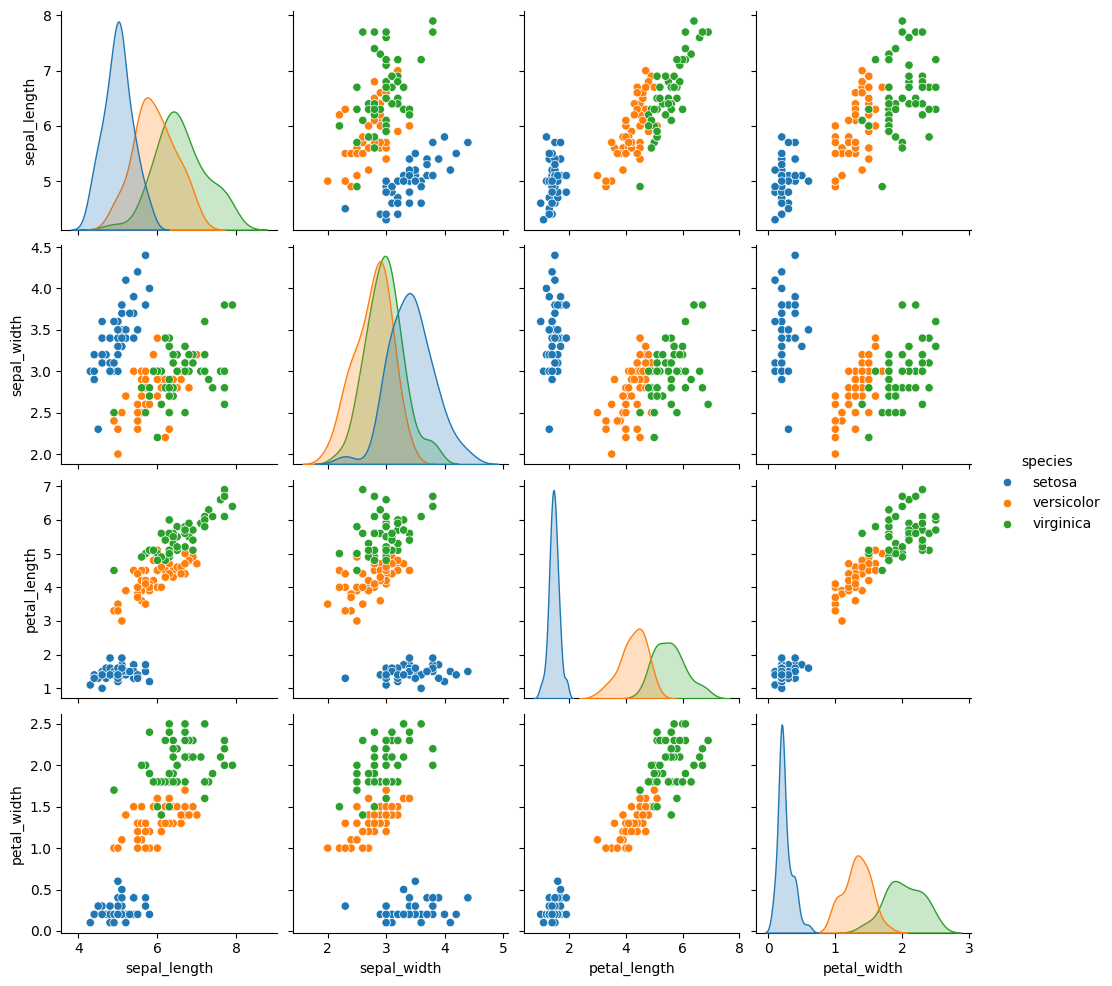

In [65]:
# 알고싶은 target에 해당하는 컬럼의 관점에서 모든 컬럼들의 관계를 시각화
sns.pairplot(data = iris_df, hue='species')
plt.show()

In [66]:
# 상관관계 값 구하고 시각화
# 범주형은 one hot encoding

In [69]:
iris_corr = pd.get_dummies(data=iris_df).corr()
iris_corr

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
sepal_length,1.000000,-0.117570,0.871754,0.817941,-0.717416,0.079396,0.638020
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.603348,-0.467703,-0.135645
petal_length,0.871754,-0.428440,1.000000,0.962865,-0.922765,0.201754,0.721011
petal_width,0.817941,-0.366126,0.962865,1.000000,-0.887344,0.117899,0.769445
species_setosa,-0.717416,0.603348,-0.922765,-0.887344,1.000000,-0.500000,-0.500000
species_versicolor,0.079396,-0.467703,0.201754,0.117899,-0.500000,1.000000,-0.500000
species_virginica,0.638020,-0.135645,0.721011,0.769445,-0.500000,-0.500000,1.000000


<Axes: >

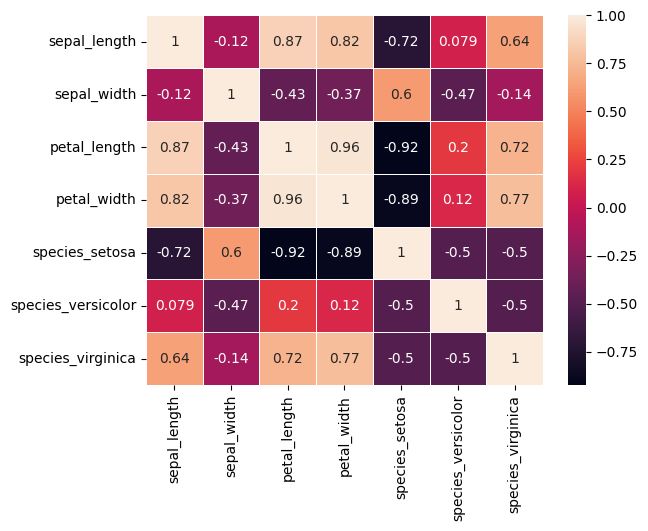

In [73]:
sns.heatmap(data=iris_corr, annot=True, linewidths=.5)

In [74]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


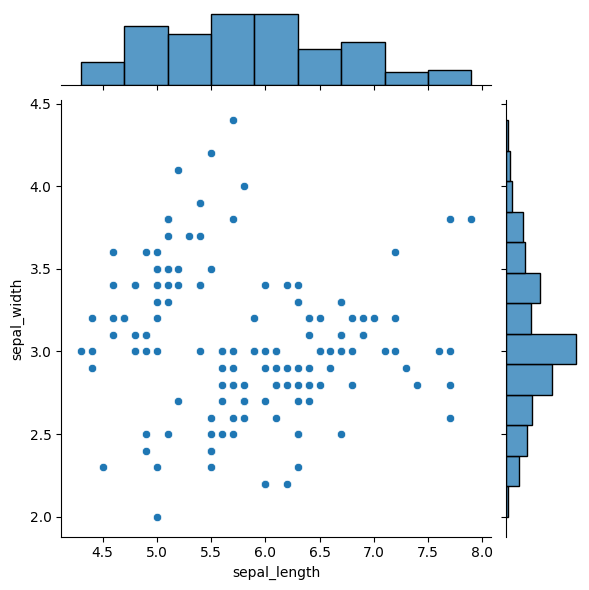

In [75]:
sns.jointplot(data = iris_df, x = 'sepal_length', y='sepal_width')
plt.show()

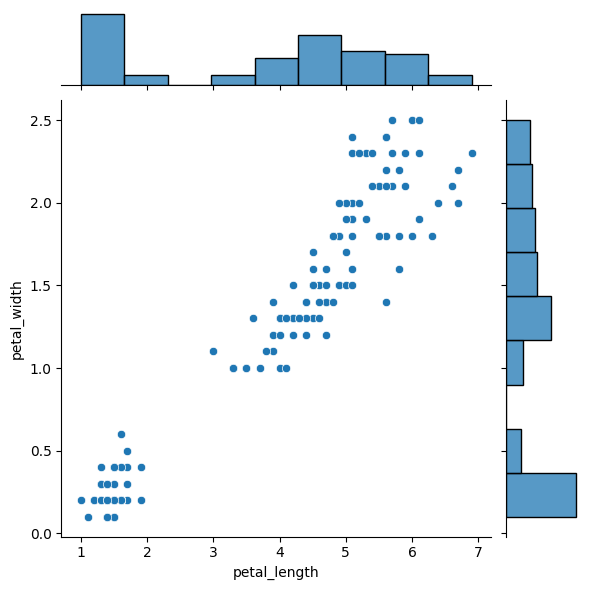

In [76]:
sns.jointplot(data = iris_df, x = 'petal_length', y='petal_width')
plt.show()

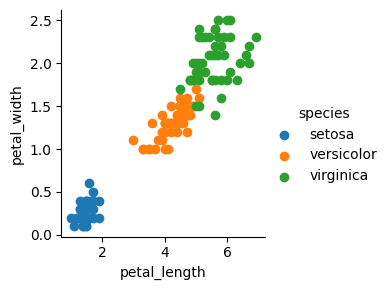

In [79]:
sns.FacetGrid(data=iris_df, hue='species').map(plt.scatter,'petal_length','petal_width').add_legend()

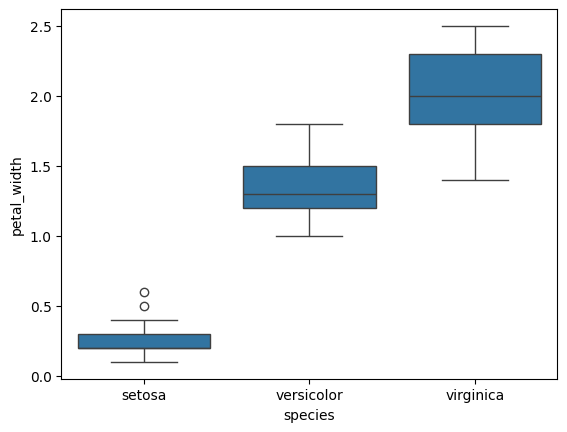

In [80]:
sns.boxplot(data = iris_df, x='species', y='petal_width')
plt.show()

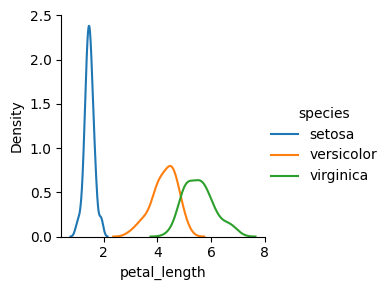

In [82]:
sns.FacetGrid(data=iris_df, hue='species').map(sns.kdeplot,'petal_length').add_legend()

In [83]:
flights_df = sns.load_dataset('flights')
flights_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [84]:
# 결측치 확인 및 데이터 모양
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


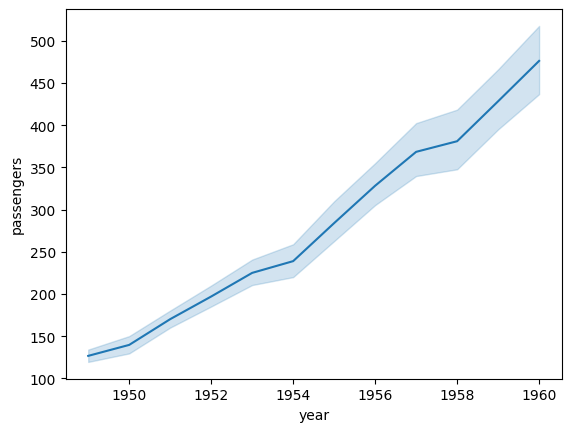

In [86]:
# 시계열 데이터
# 년도별 승객 변화추이
sns.lineplot(data=flights_df,x='year',y='passengers')
plt.show()

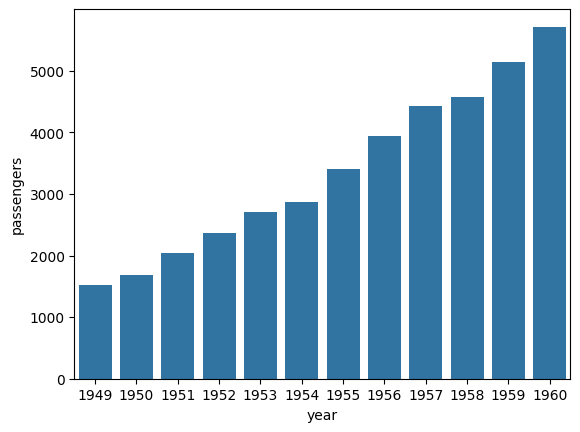

In [90]:
# 년도별 승객수 - 막대그래프
flights_year_passengers = flights_df.groupby('year')['passengers'].sum()
sns.barplot(flights_year_passengers)
plt.show()

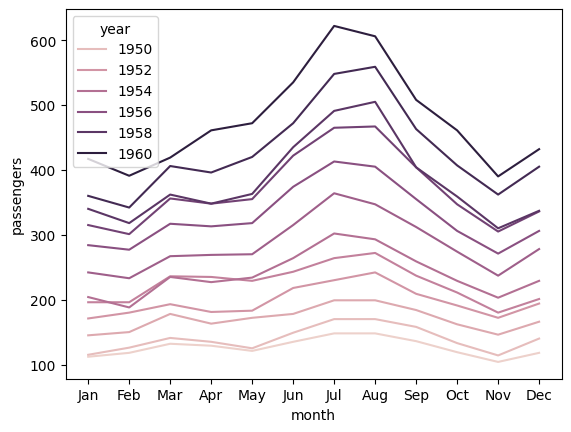

In [93]:
# 전체 월별 승객의 변화 추이
sns.lineplot(data=flights_df, x="month", y='passengers', hue='year')
plt.show()

한글폰트 적용

In [2]:
#나눔폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import pandas as pd
import seaborn as sns
house_df = pd.read_csv('/content/서울시 부동산 실거래가 정보_2023.csv',encoding='ms949')
house_df.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2023,11710,송파구,10400,송파동,1.0,대지,95.0,7.0,HANYANGLEEPS,...,11000,13.38,10.61,5.0,NaN,NaN,2012.0,연립다세대,중개거래,서울 송파구
1,2023,11530,구로구,10200,구로동,1.0,대지,546.0,17.0,오크트리빌구로1차,...,25500,26.85,18.52,3.0,NaN,NaN,2023.0,연립다세대,직거래,NaN
2,2023,11530,구로구,10200,구로동,1.0,대지,546.0,17.0,오크트리빌구로1차,...,28050,29.96,20.66,3.0,NaN,NaN,2023.0,연립다세대,직거래,NaN
3,2023,11530,구로구,10200,구로동,1.0,대지,546.0,17.0,오크트리빌구로1차,...,29550,29.99,20.69,3.0,NaN,NaN,2023.0,연립다세대,직거래,NaN
4,2023,11530,구로구,10200,구로동,1.0,대지,546.0,17.0,오크트리빌구로1차,...,27300,29.29,20.20,3.0,NaN,NaN,2023.0,연립다세대,직거래,NaN


In [4]:
# 결측치 확인 및 처리
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69536 entries, 0 to 69535
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   접수연도              69536 non-null  int64  
 1   자치구코드             69536 non-null  int64  
 2   자치구명              69536 non-null  object 
 3   법정동코드             69536 non-null  int64  
 4   법정동명              69536 non-null  object 
 5   지번구분              66818 non-null  float64
 6   지번구분명             66818 non-null  object 
 7   본번                66818 non-null  float64
 8   부번                66818 non-null  float64
 9   건물명               66822 non-null  object 
 10  계약일               69536 non-null  int64  
 11  물건금액(만원)          69536 non-null  int64  
 12  건물면적(㎡)           69536 non-null  float64
 13  토지면적(㎡)           69536 non-null  float64
 14  층                 66831 non-null  float64
 15  권리구분              593 non-null    object 
 16  취소일               3260 non-null   float6

In [5]:
house_df.describe()

,접수연도,자치구코드,법정동코드,지번구분,본번,부번,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
count,69536.0,69536.000000,69536.000000,66818.000000,66818.000000,66818.000000,6.953600e+04,6.953600e+04,69536.000000,69536.000000,66831.000000,3.260000e+03,69155.000000
mean,2023.0,11457.825659,10958.802635,1.000614,515.109970,25.839654,2.023049e+07,7.662882e+04,64.951175,20.179223,7.496461,2.023111e+07,1988.055658
std,0.0,177.914988,1278.253216,0.032592,521.240568,115.368743,1.444892e+03,8.649865e+04,57.311521,38.918437,6.312012,1.799753e+03,185.669885
min,2023.0,11110.000000,10100.000000,1.000000,0.000000,0.000000,2.009022e+07,3.000000e+03,9.940000,0.000000,-3.000000,2.023010e+07,0.000000
25%,2023.0,11305.000000,10200.000000,1.000000,150.000000,0.000000,2.023041e+07,2.700000e+04,35.700000,0.000000,3.000000,2.023052e+07,1996.000000
50%,2023.0,11470.000000,10500.000000,1.000000,410.000000,1.000000,2.023063e+07,5.000000e+04,59.250000,0.000000,5.000000,2.023081e+07,2005.000000
75%,2023.0,11620.000000,10900.000000,1.000000,728.000000,14.000000,2.023091e+07,9.670000e+04,84.660000,29.180000,11.000000,2.023103e+07,2016.000000
max,2023.0,11740.000000,18700.000000,3.000000,4974.000000,4145.000000,2.024012e+07,3.250000e+06,1840.510000,1151.000000,68.000000,2.024012e+07,2023.000000


In [6]:
house_df.describe().columns

Index(['접수연도', '자치구코드', '법정동코드', '지번구분', '본번', '부번', '계약일', '물건금액(만원)',
       '건물면적(㎡)', '토지면적(㎡)', '층', '취소일', '건축년도'],
      dtype='object')

In [7]:
house_df.describe(include = 'object')

,자치구명,법정동명,지번구분명,건물명,권리구분,건물용도,신고구분,신고한 개업공인중개사 시군구명
count,69536,69536,66818,66822,593,69536,69516,57302
unique,25,389,3,17330,2,4,2,839
top,강서구,화곡동,대지,헬리오시티,입주권,아파트,중개거래,서울 송파구
freq,5084,2215,66792,327,383,35533,57356,3577


In [8]:
house_df.describe(include = 'object').columns

Index(['자치구명', '법정동명', '지번구분명', '건물명', '권리구분', '건물용도', '신고구분',
       '신고한 개업공인중개사 시군구명'],
      dtype='object')

In [9]:
# 결측치 확인
house_df.isnull().mean()
df = house_df.drop(columns=['권리구분','취소일','지번구분','지번구분명','본번','부번'])
df.head(1)

,접수연도,자치구코드,자치구명,법정동코드,법정동명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2023,11710,송파구,10400,송파동,HANYANGLEEPS,20240123,11000,13.38,10.61,5.0,2012.0,연립다세대,중개거래,서울 송파구


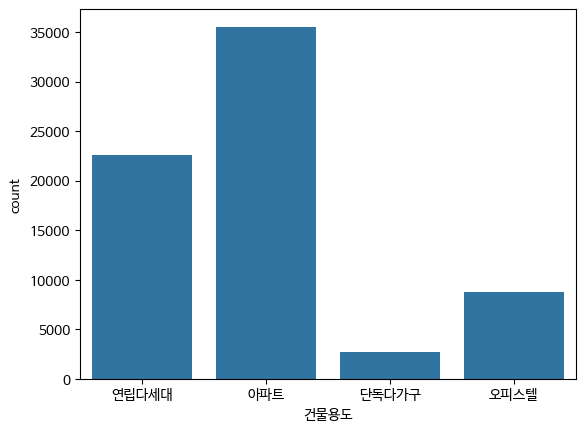

In [11]:
sns.countplot(data= df, x='건물용도')
plt.show()

In [19]:
# 건물용도가 아파트인 데이터만 추출
apt_df = df[df['건물용도'] == '아파트']
apt_df.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,건물명,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
21,2023,11440,마포구,12600,중동,현대,20231230,58000,59.54,0.0,1.0,2000.0,아파트,중개거래,서울 마포구
28,2023,11545,금천구,10200,독산동,한신아파트,20231229,59800,89.46,0.0,5.0,1991.0,아파트,중개거래,서울 금천구
31,2023,11500,강서구,10400,가양동,한강타운,20231229,105500,84.99,0.0,11.0,1993.0,아파트,중개거래,"서울 강서구, 서울 마포구"
39,2023,11560,영등포구,13300,대림동,대림현대,20231229,57900,59.76,0.0,4.0,1999.0,아파트,중개거래,서울 영등포구
45,2023,11305,강북구,10100,미아동,한화 포레나 미아,20231229,113971,84.87,0.0,6.0,0.0,아파트,중개거래,서울 강북구


<Axes: ylabel='자치구명'>

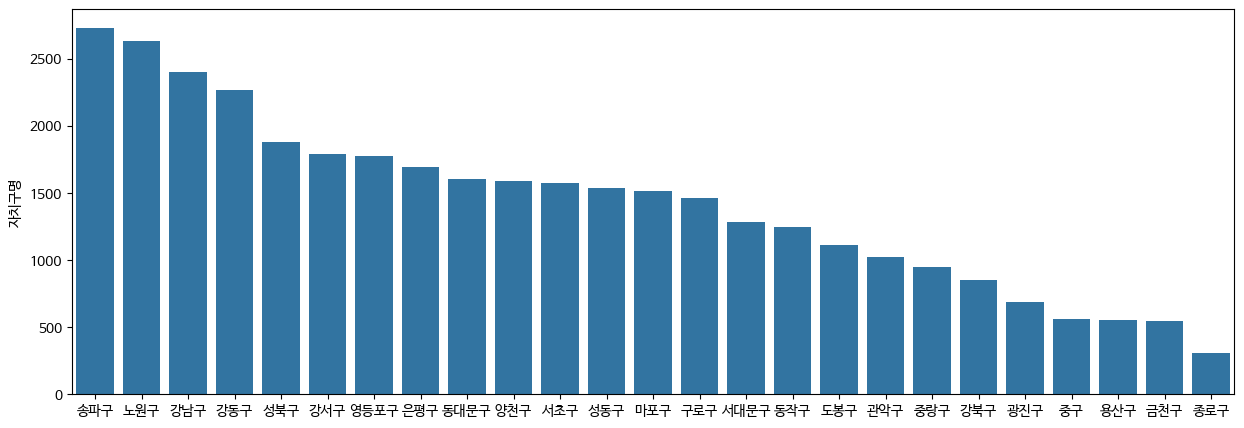

In [35]:
# 자치구명 별로 거래량
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
# sns.countplot(data = apt_df, x = '자치구명')
# plt.show()
# 이런형태는 크기순으로 정렬
sns.barplot(apt_df['자치구명'].value_counts().sort_values(ascending=False))

In [ ]:
# 자치구명별 거래 금액 시각화
# 숙제